# Task 2

## Project 2: Sales Performance Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("sales_data.csv")
df.head()

,Product,Region,Category,Sales,Profit,Discount,Date
0,Product_0,East,Office Supplies,2932,958,0.07,2022-01-01
1,Product_1,West,Technology,3679,-399,0.22,2022-01-02
2,Product_2,North,Technology,3131,1822,0.29,2022-01-03
3,Product_3,East,Office Supplies,4264,1136,0.47,2022-01-04
4,Product_4,East,Technology,2693,540,0.13,2022-01-05


In [5]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (500, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   500 non-null    object 
 1   Region    500 non-null    object 
 2   Category  500 non-null    object 
 3   Sales     500 non-null    int64  
 4   Profit    500 non-null    int64  
 5   Discount  500 non-null    float64
 6   Date      500 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 27.5+ KB


In [6]:
df.isnull().sum()

Product     0
Region      0
Category    0
Sales       0
Profit      0
Discount    0
Date        0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['Sales'].fillna(df['Sales'].median(), inplace=True)
df['Profit'].fillna(df['Profit'].median(), inplace=True)
df['Discount'].fillna(df['Discount'].median(), inplace=True)

df['Region'].fillna('Unknown', inplace=True)
df['Category'].fillna('Unknown', inplace=True)
df['Product'].fillna('Not Available', inplace=True)

C:\Users\SANSKRUTI\AppData\Local\Temp\ipykernel_12588\2139235243.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(df['Sales'].median(), inplace=True)
C:\Users\SANSKRUTI\AppData\Local\Temp\ipykernel_12588\2139235243.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\SANSKRUTI\AppData\Local\Temp\ipykernel_12588\3832296461.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_time['Sales'].resample('M').sum()


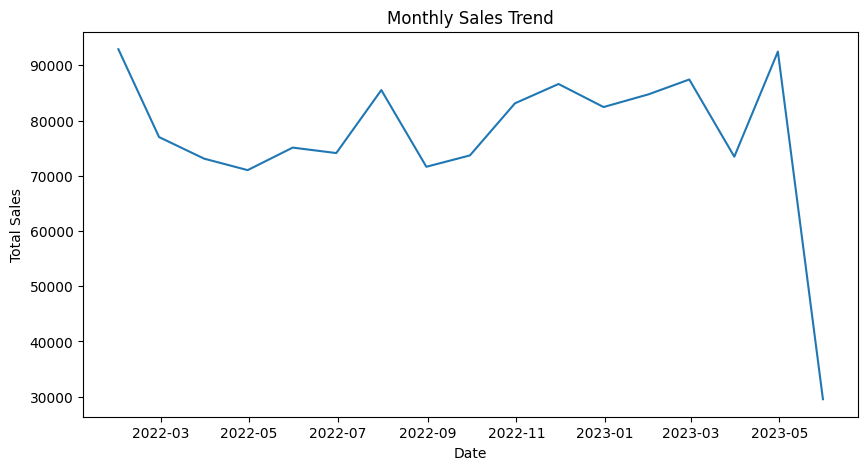

In [10]:
df_time = df.set_index('Date')

monthly_sales = df_time['Sales'].resample('M').sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

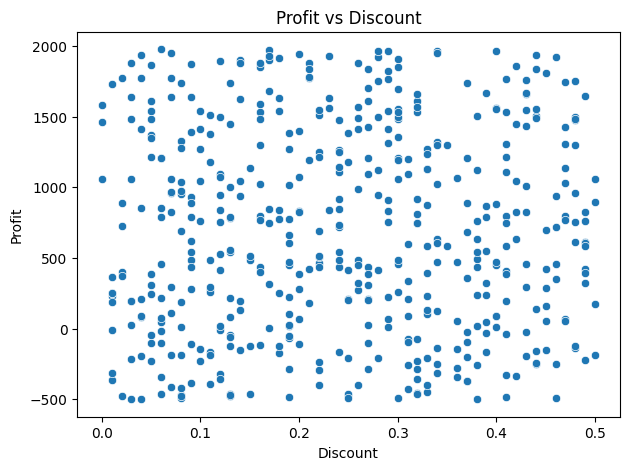

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Profit vs Discount")
plt.show()

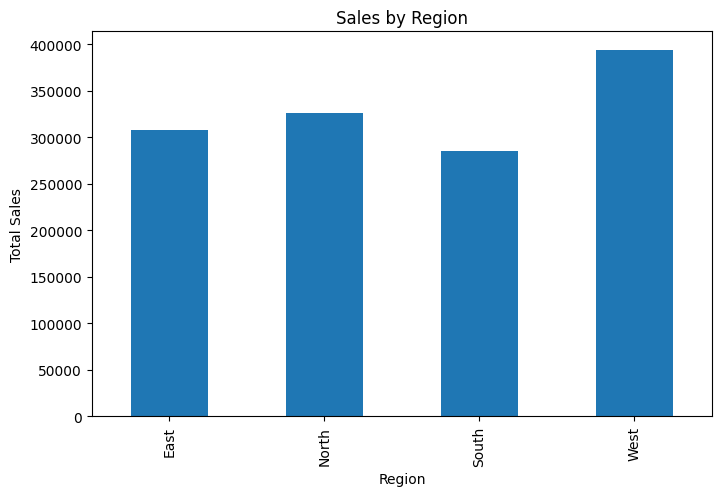

In [12]:
plt.figure(figsize=(8,5))
df.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.show()

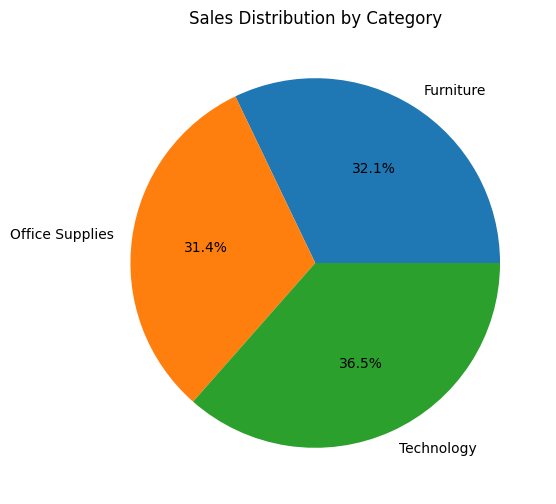

In [13]:
plt.figure(figsize=(6,6))
df.groupby('Category')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.show()

In [14]:
X = df[['Profit', 'Discount']]
y = df['Sales']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [17]:
y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 2068889.8664901685
R² Score: -0.05563235743128914
Coefficients: [3.01095246e-03 5.40896315e+02]
Intercept: 2437.5101813912934
